In [7]:
import pandas as pd

overdose = pd.read_csv('Overdose.csv')

#Filter for years after or at 2018. Removing the row containing the population for each
#county per year in order to avoid counting it towards the overdose count
mask = (overdose['Year'] >= 2018) & (overdose['Source']!= 'Population')
overdose = overdose[mask]

#Overdoses by years 2018, 2019, 2020
overdose = overdose.groupby(['County', 'Year'])["Count"].sum().reset_index()
overdose = overdose.rename(columns={'Count':'Overdoses'})
year18 = overdose[overdose["Year"] == 2018] 
year19 = overdose[overdose["Year"] == 2019] 
year20 = overdose[overdose["Year"] == 2020] 
overdose['2018 Overdoses'] = year18["Overdoses"]
overdose['2019 Overdoses'] = year19["Overdoses"]
overdose['2020 Overdoses'] = year20["Overdoses"]
overdose = overdose.drop(columns = ["Year", "Overdoses"]).groupby("County").sum().reset_index()
overdose.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses
0,Alamance,2263.0,2231.0,2351.0
1,Alexander,642.0,432.0,459.0
2,Alleghany,137.0,120.0,165.0
3,Anson,459.0,303.0,444.0
4,Ashe,370.0,347.0,322.0
...,...,...,...,...
95,Wayne,1613.0,2054.0,1658.0
96,Wilkes,1356.0,1158.0,1044.0
97,Wilson,817.0,988.0,1316.0
98,Yadkin,767.0,544.0,607.0


In [8]:
income = pd.read_csv('income.csv')

income = income.rename(columns={'Region': 'County', '2018' : '2018 Per Capita Income', '2019' : '2019 Per Capita Income', '2020' : '2020 Per Capita Income'})
income.head(100)

,County,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income
0,Alamance,39742,41256,43973
1,Alexander,36539,37758,40176
2,Alleghany,36576,37987,40599
3,Anson,35135,37741,38785
4,Ashe,34791,36643,39612
...,...,...,...,...
95,Wayne,38115,40116,42882
96,Wilkes,36445,37309,39518
97,Wilson,39158,40260,43111
98,Yadkin,37328,39012,41250


In [9]:
#merge together for our combined dataset
data = pd.merge(overdose, income, on = "County")

#Convert float to int
data['2018 Overdoses'] = data['2018 Overdoses'].astype(int)
data['2019 Overdoses'] = data['2019 Overdoses'].astype(int)
data['2020 Overdoses'] = data['2020 Overdoses'].astype(int)

data.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income
0,Alamance,2263,2231,2351,39742,41256,43973
1,Alexander,642,432,459,36539,37758,40176
2,Alleghany,137,120,165,36576,37987,40599
3,Anson,459,303,444,35135,37741,38785
4,Ashe,370,347,322,34791,36643,39612
...,...,...,...,...,...,...,...
95,Wayne,1613,2054,1658,38115,40116,42882
96,Wilkes,1356,1158,1044,36445,37309,39518
97,Wilson,817,988,1316,39158,40260,43111
98,Yadkin,767,544,607,37328,39012,41250


In [10]:
population = pd.read_csv('county_estimates_2020.csv', sep = ";")
population = population.drop(columns = ["Estimate", "geom", "centroid"])
population["Year"] = pd.DatetimeIndex(population["Year"]).year
population = population.sort_values(["County", "Year"]).reset_index().drop(columns = "index")


#If year and county is the same, take the latest reported data for that year
population = population.drop_duplicates(subset = ['County','Year'], keep = 'last')

#rearrangement
population = population[population["Year"] >= 2018] 
year18 = population[population["Year"] == 2018] 
year19 = population[population["Year"] == 2019] 
year20 = population[population["Year"] == 2020] 

population = population.drop(columns = "Year")
population['2018 Population'] = year18["value"]
population['2019 Population'] = year19["value"]
population['2020 Population'] = year20["value"]
population = population.drop(columns = "value")
#overdose = overdose.drop(columns = ["Year", "Overdoses"]).groupby("County").sum().reset_index()

population = population.groupby("County").sum().reset_index()


#Convert to int
population['2018 Population'] = population['2018 Population'].astype(int)
population['2019 Population'] = population['2019 Population'].astype(int)
population['2020 Population'] = population['2020 Population'].astype(int)

population.head(100)

,County,2018 Population,2019 Population,2020 Population
0,Alamance,167407,169785,171980
1,Alexander,36664,36565,36444
2,Alleghany,10924,10919,10867
3,Anson,23075,21999,22030
4,Ashe,26591,26645,26577
...,...,...,...,...
95,Wayne,117851,117947,117333
96,Wilkes,66445,66189,65827
97,Wilson,78585,78991,78784
98,Yadkin,37251,37247,37187


In [11]:
#Combine pop with data
data["2018 Overdoses Per Capita"] = data["2018 Overdoses"] / population["2018 Population"]
data["2019 Overdoses Per Capita"] = data["2019 Overdoses"] / population["2019 Population"]
data["2020 Overdoses Per Capita"] = data["2020 Overdoses"] / population["2020 Population"]
data = pd.merge(data, population)
data = data.round(decimals = 3)


#Final Dataset
finalData = data
finalData.head(100)

,County,2018 Overdoses,2019 Overdoses,2020 Overdoses,2018 Per Capita Income,2019 Per Capita Income,2020 Per Capita Income,2018 Overdoses Per Capita,2019 Overdoses Per Capita,2020 Overdoses Per Capita,2018 Population,2019 Population,2020 Population
0,Alamance,2263,2231,2351,39742,41256,43973,0.014,0.013,0.014,167407,169785,171980
1,Alexander,642,432,459,36539,37758,40176,0.018,0.012,0.013,36664,36565,36444
2,Alleghany,137,120,165,36576,37987,40599,0.013,0.011,0.015,10924,10919,10867
3,Anson,459,303,444,35135,37741,38785,0.020,0.014,0.020,23075,21999,22030
4,Ashe,370,347,322,34791,36643,39612,0.014,0.013,0.012,26591,26645,26577
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Wayne,1613,2054,1658,38115,40116,42882,0.014,0.017,0.014,117851,117947,117333
96,Wilkes,1356,1158,1044,36445,37309,39518,0.020,0.017,0.016,66445,66189,65827
97,Wilson,817,988,1316,39158,40260,43111,0.010,0.013,0.017,78585,78991,78784
98,Yadkin,767,544,607,37328,39012,41250,0.021,0.015,0.016,37251,37247,37187


In [13]:
# Statistical inference section
# Separates big dataframe into sections by year, orders by income for readability if we need the raw data table later on
# Statistical tests between income brackets, defined as fractions (quarters) of range of per cap income in given year

import scipy.stats as stats
import scikit_posthocs as sp
import numpy as np

### 2018
data18 = finalData[['County', '2018 Per Capita Income', '2018 Overdoses Per Capita']]
data18.sort_values(by='2018 Per Capita Income', axis='index')
range18 = data18['2018 Per Capita Income'].max() - data18['2018 Per Capita Income'].min()
q1_18, q2_18, q3_18 = [data18['2018 Per Capita Income'].min() + i*range18/4 for i in range(1, 4)]
#q1_18, q2_18, q3_18 = [data18['2018 Per Capita Income'].quantile(q=i, interpolation='midpoint') for i in [0.25, 0.5, 0.75]]

q1_18_mask = data18['2018 Per Capita Income'] <= q1_18
q2_18_mask = (data18['2018 Per Capita Income'] > q1_18) & (data18['2018 Per Capita Income'] <= q2_18)
q3_18_mask = (data18['2018 Per Capita Income'] > q2_18) & (data18['2018 Per Capita Income'] <= q3_18)
q4_18_mask = data18['2018 Per Capita Income'] > q3_18

### 2019
data19 = finalData[['County', '2019 Per Capita Income', '2019 Overdoses Per Capita']]
data19.sort_values(by='2019 Per Capita Income', axis='index')
range19 = data19['2019 Per Capita Income'].max() - data19['2019 Per Capita Income'].min()
q1_19, q2_19, q3_19 = [data19['2019 Per Capita Income'].min() + i*range18/4 for i in range(1, 4)]
#q1_19, q2_19, q3_19 = [data19['2019 Per Capita Income'].quantile(q=i, interpolation='midpoint') for i in [0.25, 0.5, 0.75]]

q1_19_mask = data19['2019 Per Capita Income'] <= q1_19
q2_19_mask = (data19['2019 Per Capita Income'] > q1_19) & (data19['2019 Per Capita Income'] <= q2_19)
q3_19_mask = (data19['2019 Per Capita Income'] > q2_19) & (data19['2019 Per Capita Income'] <= q3_19)
q4_19_mask = data19['2019 Per Capita Income'] > q3_19

### 2020
data20 = finalData[['County', '2020 Per Capita Income', '2020 Overdoses Per Capita']]
data20.sort_values(by='2020 Per Capita Income', axis='index')
range20 = data20['2020 Per Capita Income'].max() - data20['2020 Per Capita Income'].min()
q1_20, q2_20, q3_20 = [data20['2020 Per Capita Income'].min() + i*range18/4 for i in range(1, 4)]
#q1_20, q2_20, q3_20 = [data20['2020 Per Capita Income'].quantile(q=i, interpolation='midpoint') for i in [0.25, 0.5, 0.75]]

q1_20_mask = data20['2020 Per Capita Income'] <= q1_20
q2_20_mask = (data20['2020 Per Capita Income'] > q1_20) & (data20['2020 Per Capita Income'] <= q2_20)
q3_20_mask = (data20['2020 Per Capita Income'] > q2_20) & (data20['2020 Per Capita Income'] <= q3_20)
q4_20_mask = data20['2020 Per Capita Income'] > q3_20

### One-way ANOVA by year (alpha = 0.05), documented here: https://www.pythonfordatascience.org/anova-python/

anova_18 = stats.f_oneway(data18['2018 Overdoses Per Capita'][q1_18_mask], data18['2018 Overdoses Per Capita'][q2_18_mask], data18['2018 Overdoses Per Capita'][q3_18_mask], data18['2018 Overdoses Per Capita'][q4_18_mask])
anova_19 = stats.f_oneway(data19['2019 Overdoses Per Capita'][q1_19_mask], data19['2019 Overdoses Per Capita'][q2_19_mask], data19['2019 Overdoses Per Capita'][q3_19_mask], data19['2019 Overdoses Per Capita'][q4_19_mask])
anova_20 = stats.f_oneway(data20['2020 Overdoses Per Capita'][q1_20_mask], data20['2020 Overdoses Per Capita'][q2_20_mask], data20['2020 Overdoses Per Capita'][q3_20_mask], data20['2020 Overdoses Per Capita'][q4_20_mask])
print(anova_18)
print(anova_19)
print(anova_20)

### Post-hoc T-tests by year (Bonferroni Correction), documented here: https://scikit-posthocs.readthedocs.io/en/latest/generated/scikit_posthocs.posthoc_ttest/

od18 = np.asarray([data18['2018 Overdoses Per Capita'][q1_18_mask], data18['2018 Overdoses Per Capita'][q2_18_mask], data18['2018 Overdoses Per Capita'][q3_18_mask], data18['2018 Overdoses Per Capita'][q4_18_mask]], dtype=object)
od19 = np.asarray([data19['2019 Overdoses Per Capita'][q1_19_mask], data19['2019 Overdoses Per Capita'][q2_19_mask], data19['2019 Overdoses Per Capita'][q3_19_mask], data19['2019 Overdoses Per Capita'][q4_19_mask]], dtype=object)
od20 = np.asarray([data20['2020 Overdoses Per Capita'][q1_20_mask], data20['2020 Overdoses Per Capita'][q2_20_mask], data20['2020 Overdoses Per Capita'][q3_20_mask], data20['2020 Overdoses Per Capita'][q4_20_mask]], dtype=object)

ph_ttest_18 = sp.posthoc_ttest(od18, p_adjust = 'bonferroni')
ph_ttest_19 = sp.posthoc_ttest(od19, p_adjust = 'bonferroni')
ph_ttest_20 = sp.posthoc_ttest(od20, p_adjust = 'bonferroni')

print(ph_ttest_18)
print(ph_ttest_19)
print(ph_ttest_20)

F_onewayResult(statistic=2.3647933238535264, pvalue=0.0758304391882704)
F_onewayResult(statistic=2.166202740285198, pvalue=0.09701555330045811)
F_onewayResult(statistic=2.1246044712022725, pvalue=0.10214196000092149)
          1         2         3         4
1  1.000000  1.000000  1.000000  0.188914
2  1.000000  1.000000  1.000000  0.049923
3  1.000000  1.000000  1.000000  0.181148
4  0.188914  0.049923  0.181148  1.000000
          1         2         3         4
1  1.000000  1.000000  1.000000  0.326118
2  1.000000  1.000000  1.000000  0.037075
3  1.000000  1.000000  1.000000  0.044729
4  0.326118  0.037075  0.044729  1.000000
          1         2         3         4
1  1.000000  1.000000  1.000000  0.402727
2  1.000000  1.000000  0.605408  0.078627
3  1.000000  0.605408  1.000000  0.396795
4  0.402727  0.078627  0.396795  1.000000


Text(0.5, 1.0, 'Income vs OD Rates (2018)')

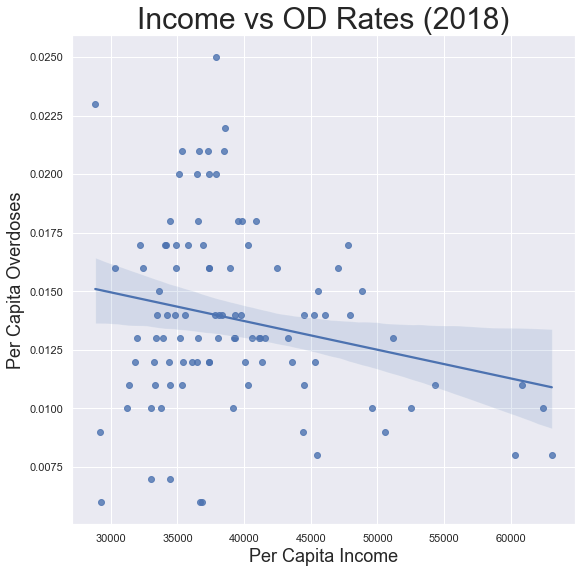

In [14]:
import seaborn as sns

#Creating a scatter plot of income vs overdoses per capita each individual year
#Then, all 3 years combined into one plot (esentially each county is represented 3 times in last graph, once for each year 18, 19, 20)
# Instead of using relplot, regplot was used in order to automatically create a best fit line for each graph
sns.set_theme()
sns.set(rc={"figure.figsize":(9, 9)})
ex = sns.regplot(x='2018 Per Capita Income', y="2018 Overdoses Per Capita", data=finalData)
ex.set_xlabel('Per Capita Income', size = 18)
ex.set_ylabel('Per Capita Overdoses', size = 18)
ex.set_title('Income vs OD Rates (2018)', size = 30)

Text(0.5, 1.0, 'Income vs OD Rates (2019)')

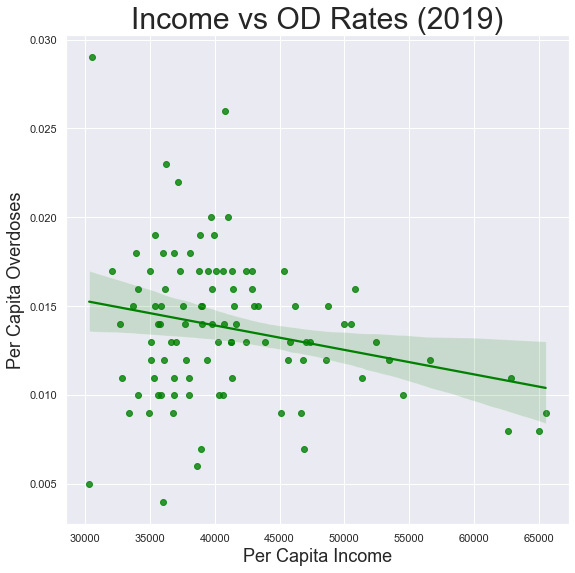

In [15]:
dx = sns.regplot(x='2019 Per Capita Income', y="2019 Overdoses Per Capita", data=finalData, color = 'green')
sns.set(rc={"figure.figsize":(9, 9)})
dx.set_xlabel('Per Capita Income', size = 18)
dx.set_ylabel('Per Capita Overdoses', size = 18)
dx.set_title('Income vs OD Rates (2019)', size = 30)

Text(0.5, 1.0, 'Income vs OD Rates (2020)')

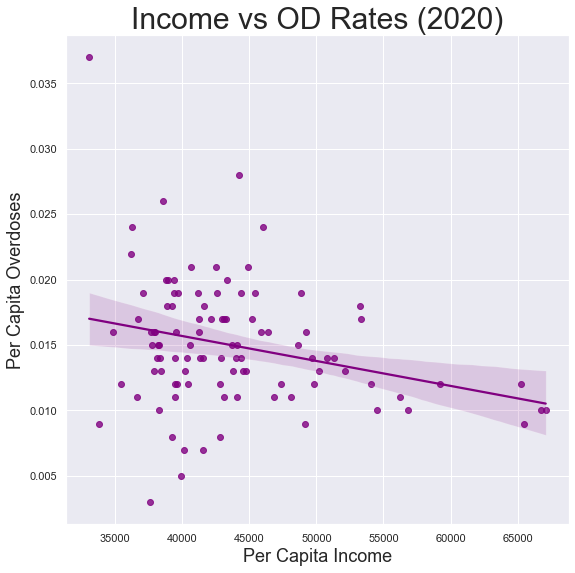

In [16]:
cx = sns.regplot(x='2020 Per Capita Income', y="2020 Overdoses Per Capita", data=finalData, color ='purple')
sns.set(rc={"figure.figsize":(9, 9)})
cx.set_xlabel('Per Capita Income', size = 18)
cx.set_ylabel('Per Capita Overdoses', size = 18)
cx.set_title('Income vs OD Rates (2020)', size = 30)

AxesSubplot(0.125,0.125;0.775x0.755)


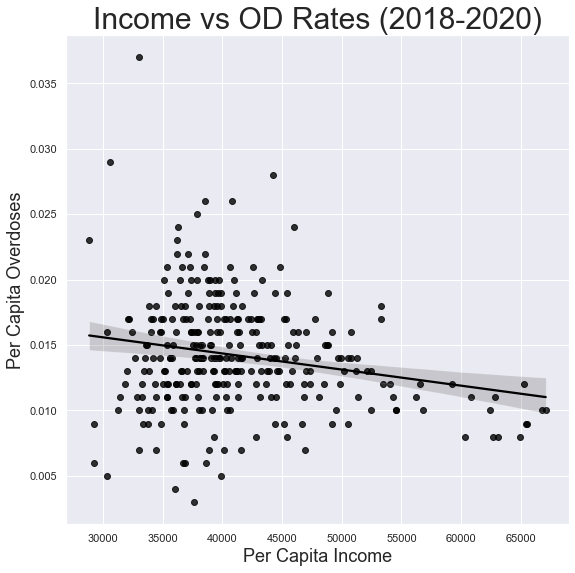

In [17]:
df_18 = finalData[['2018 Overdoses Per Capita', '2018 Per Capita Income']].copy()
df_19 = finalData[['2019 Overdoses Per Capita', '2019 Per Capita Income']].copy()
df_20 = finalData[['2020 Overdoses Per Capita', '2020 Per Capita Income']].copy()

df_18.rename(columns = {'2018 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2018 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

df_19.rename(columns = {'2019 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2019 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

df_20.rename(columns = {'2020 Overdoses Per Capita':'Overdoses Per Capita (18-20)',
                                                '2020 Per Capita Income':'Per Capita Income (18-20)'}, inplace = True)

allpoints = pd.concat([df_18, df_19, df_20], axis=0, ignore_index=True)

bx = sns.regplot(x='Per Capita Income (18-20)', y="Overdoses Per Capita (18-20)", data=allpoints, color ='black')
bx.set_xlabel('Per Capita Income', size = 18)
bx.set_ylabel('Per Capita Overdoses', size = 18)
bx.set_title('Income vs OD Rates (2018-2020)', size = 30)
sns.set(rc={"figure.figsize":(9, 9)})
print(bx)


AxesSubplot(0.125,0.125;0.775x0.755)


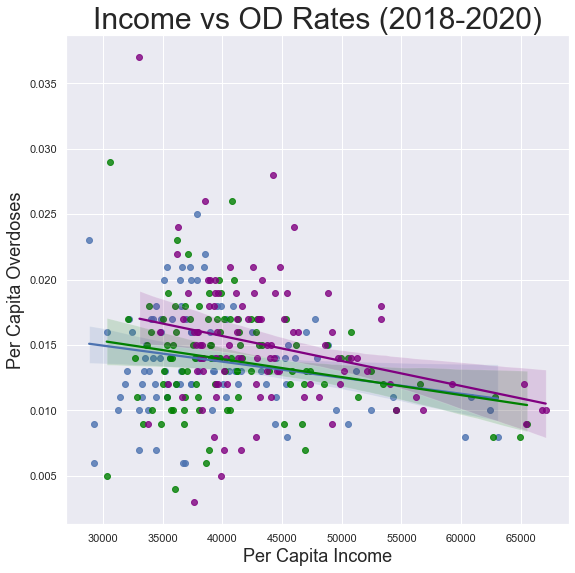

In [18]:
#This is the same graph as the one above (black graph), where each county is plotted for each year 2018-2020, but stylized in a way where each color represents a year

sns.regplot(x='2018 Per Capita Income', y="2018 Overdoses Per Capita", data=finalData)
sns.regplot(x='2019 Per Capita Income', y="2019 Overdoses Per Capita", data=finalData, color = 'green')
ax = sns.regplot(x='2020 Per Capita Income', y="2020 Overdoses Per Capita", data=finalData, color ='purple') 
ax.set_xlabel('Per Capita Income', size = 18)
ax.set_ylabel('Per Capita Overdoses', size = 18)
ax.set_title('Income vs OD Rates (2018-2020)', size = 30)
sns.set(rc={"figure.figsize":(9, 9)})
print(ax)

In [19]:
#Graphs above show a best fit line automatically generated by sns.regplot, but now we will perform our own linear regression on each year as well (as the data set containing
#all the data points) to find an MSE and r^2 value

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data2018 = finalData[['2018 Per Capita Income']].values
target2018 = finalData['2018 Overdoses Per Capita'].values

linear_model2018 = LinearRegression()
linear_model2018.fit(X = data2018, y = target2018)

predicted2018 = linear_model2018.predict(data2018)

mse2018 = mean_squared_error(target2018, predicted2018)
r2_2018 = r2_score(target2018, predicted2018) 


median2018 = np.median(finalData['2018 Overdoses Per Capita'])
baseline2018 = np.full(predicted2018.shape, median2018)

base_mse2018 = mean_squared_error(target2018, baseline2018) 
base_r2_2018 = r2_score(target2018, baseline2018)


print("Model MSE 2018:", mse2018)
print("r^2 2018:", r2_2018)
print("Baseline MSE 2018:", base_mse2018)
print("r^2 2018:", base_r2_2018)



Model MSE 2018: 1.4351285373739353e-05
r^2 2018: 0.0488026343660124
Baseline MSE 2018: 1.576e-05
r^2 2018: -0.04456639889710767


In [20]:
data2019 = finalData[['2019 Per Capita Income']].values
target2019 = finalData['2019 Overdoses Per Capita'].values

linear_model2019 = LinearRegression()
linear_model2019.fit(X = data2019, y = target2019)

predicted2019 = linear_model2019.predict(data2019)

mse2019 = mean_squared_error(target2019, predicted2019)
r2_2019 = r2_score(target2019, predicted2019) 


median2019 = np.median(finalData['2019 Overdoses Per Capita'])
baseline2019 = np.full(predicted2019.shape, median2019)

base_mse2019 = mean_squared_error(target2019, baseline2019) 
base_r2_2019 = r2_score(target2019, baseline2019)


print("Model MSE 2019:", mse2019)
print("r^2 2019:", r2_2019)
print("Baseline MSE 2019:", base_mse2019)
print("r^2 2019:", base_r2_2019)

Model MSE 2019: 1.561666522621682e-05
r^2 2019: 0.05793744224159736
Baseline MSE 2019: 1.663e-05
r^2 2019: -0.003191149235993951


In [21]:
data2020 = finalData[['2020 Per Capita Income']].values
target2020 = finalData['2020 Overdoses Per Capita'].values

linear_model2020 = LinearRegression()
linear_model2020.fit(X = data2020, y = target2020)

predicted2020 = linear_model2020.predict(data2020)

mse2020 = mean_squared_error(target2020, predicted2020)
r2_2020 = r2_score(target2020, predicted2020) 


median2020 = np.median(finalData['2020 Overdoses Per Capita'])
baseline2020 = np.full(predicted2020.shape, median2020)

base_mse2020 = mean_squared_error(target2020, baseline2020) 
base_r2_2020 = r2_score(target2020, baseline2020)


print("Model MSE 2020:", mse2020)
print("r^2 2020:", r2_2020)
print("Baseline MSE 2020:", base_mse2020)
print("r^2 2020:", base_r2_2020)

Model MSE 2020: 2.169677098603962e-05
r^2 2020: 0.07551755346222833
Baseline MSE 2020: 2.4410000000000005e-05
r^2 2020: -0.040091013289815125


In [22]:
data_all = allpoints[['Per Capita Income (18-20)']].values
target_all = allpoints['Overdoses Per Capita (18-20)'].values

linear_model_all = LinearRegression()
linear_model_all.fit(X = data_all, y = target_all)

predicted_all = linear_model_all.predict(data_all)

mse_all = mean_squared_error(target_all, predicted_all)
r2_all = r2_score(target_all, predicted_all) 


median_all = np.median(allpoints['Overdoses Per Capita (18-20)'])
baseline_all = np.full(predicted_all.shape, median_all)

base_mse_all = mean_squared_error(target_all, baseline_all) 
base_r2_all = r2_score(target_all, baseline_all)


print("Model MSE All 2018-2020 Datapoints:", mse_all)
print("r^2 All 2018-2020 Datapoints:", r2_all)
print("Baseline All 2018-2020 Datapoints:", base_mse_all)
print("r^2 All 2018-2020 Datapoints:", base_r2_all)

Model MSE All 2018-2020 Datapoints: 1.7883221352466756e-05
r^2 All 2018-2020 Datapoints: 0.0429182513736347
Baseline All 2018-2020 Datapoints: 1.872e-05
r^2 All 2018-2020 Datapoints: -0.0018648196072461598
